In [1]:
#Installing the imbalanced learn module for access to a variety of over-sampling methods

#!pip install imbalanced-learn
#!pip install numpy==1.21
#!pip install lxml

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Data/clean_gss.csv')
df.head()
print(df.shape)

(688, 16)


In [4]:
# Getting rid of redundant columns from initial dataframe

gss= df[['SATJOB','WRKHOME', 'HLTHPHYS', 'HLTHMNTL', 'CONWKDAY', 'PARTLSC', 'EDUC', 'is_si', 'MOREWEEKS', 'Age Group']]
gss.head()

,SATJOB,WRKHOME,HLTHPHYS,HLTHMNTL,CONWKDAY,PARTLSC,EDUC,is_si,MOREWEEKS,Age Group
0,1.0,1.0,1.0,1.0,4.0,3.0,4,0,1,4
1,1.0,1.0,3.0,2.0,3.0,2.0,3,1,1,3
2,1.0,1.0,2.0,3.0,4.0,5.0,2,0,4,2
3,2.0,1.0,2.0,3.0,4.0,1.0,2,1,1,3
4,2.0,1.0,3.0,3.0,2.0,1.0,3,1,1,2


<Axes: >

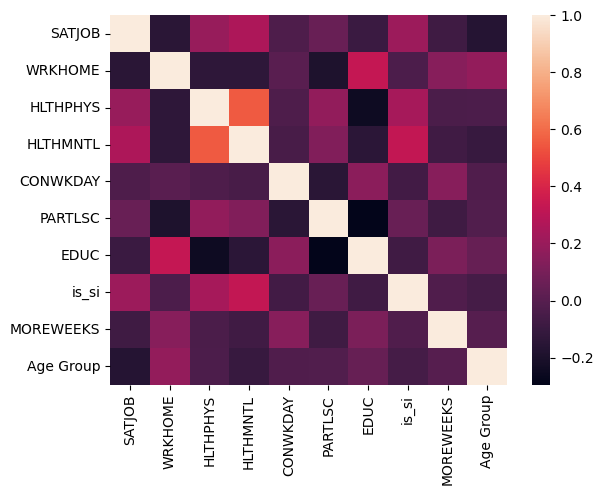

In [5]:
# Checking for multicollinearity- looks good

corr = gss.corr()
sns.heatmap(corr)

In [6]:
# Starting to split data to prepare for modeling

X= gss[['SATJOB','WRKHOME', 'HLTHPHYS', 'HLTHMNTL', 'CONWKDAY', 'PARTLSC','EDUC', 'MOREWEEKS', 'Age Group' ]]
y= gss['is_si']

In [7]:
from imblearn.over_sampling import SMOTEN
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42)

# Resampling only the training data
os= SMOTEN(random_state= 42)
os_X, os_y= os.fit_resample(X_train, y_train)

In [8]:
# Verifying we now have 50/50 isolated to non-isolated for training data

os_y.value_counts()

1    364
0    364
Name: is_si, dtype: int64

In [9]:
# SATJOB, HLTHPHYS, PARTLSC, MARITAL_2, MARITAL_5 all have p-value above 0.05 lacking statistical significance

import statsmodels.api as sm

sm_logit = sm.Logit(os_y, os_X)
result = sm_logit.fit()
print(result.summary())

#save results for later
summary_df5 = pd.read_html(result.summary().tables[1].as_html(), header=0, index_col=0)[0]

Optimization terminated successfully.
         Current function value: 0.581913
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                  is_si   No. Observations:                  728
Model:                          Logit   Df Residuals:                      719
Method:                           MLE   Df Model:                            8
Date:                Thu, 13 Apr 2023   Pseudo R-squ.:                  0.1605
Time:                        10:11:33   Log-Likelihood:                -423.63
converged:                       True   LL-Null:                       -504.61
Covariance Type:            nonrobust   LLR p-value:                 6.232e-31
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
SATJOB         0.2740      0.109      2.509      0.012       0.060       0.488
WRKHOME       -0.2468      0.

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

sk_logit = LogisticRegression()
sk_logit.fit(os_X, os_y)
y_pred = sk_logit.predict(X_test)
print('Accuracy on test set:{:.2f}'.format(sk_logit.score(X_test, y_test)))

Accuracy on test set:0.67


In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.70      0.76       156
           1       0.39      0.59      0.47        51

    accuracy                           0.67       207
   macro avg       0.61      0.64      0.62       207
weighted avg       0.73      0.67      0.69       207



In [12]:
for age_group in gss['Age Group'].unique():
    age = gss.loc[gss['Age Group']== age_group]
    
    # Starting to split data to prepare for modeling
    
    #'Marital_2.0','Marital_3.0', 'Marital_4.0', 'Marital_5.0'
    X= age[['SATJOB','WRKHOME', 'HLTHPHYS', 'HLTHMNTL', 'CONWKDAY', 'PARTLSC','EDUC', 'MOREWEEKS']]
    y= age['is_si']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42)

    # Resampling only the training data
    os= SMOTEN(random_state= 42)
    os_X, os_y= os.fit_resample(X_train, y_train)

    sm_logit = sm.Logit(os_y, os_X)
    result = sm_logit.fit()
    print("Age Group:{:.2f}".format(age_group))
    print(result.summary())

    sk_logit = LogisticRegression()
    sk_logit.fit(os_X, os_y)
    y_pred = sk_logit.predict(X_test)
    print('Accuracy on test set:{:.2f}'.format(sk_logit.score(X_test, y_test)))

#Saving summary data to a dataframe for plots
    if age_group==1.0:
        summary_df1 = pd.read_html(result.summary().tables[1].as_html(), header=0, index_col=0)[0]

    if age_group==2.0:
        summary_df2 = pd.read_html(result.summary().tables[1].as_html(), header=0, index_col=0)[0]

    if age_group==3.0:
        summary_df3 = pd.read_html(result.summary().tables[1].as_html(), header=0, index_col=0)[0]

    if age_group==4.0:
        summary_df4 = pd.read_html(result.summary().tables[1].as_html(), header=0, index_col=0)[0]


    

Optimization terminated successfully.
         Current function value: 0.457409
         Iterations 6
Age Group:4.00
                           Logit Regression Results                           
Dep. Variable:                  is_si   No. Observations:                  104
Model:                          Logit   Df Residuals:                       96
Method:                           MLE   Df Model:                            7
Date:                Thu, 13 Apr 2023   Pseudo R-squ.:                  0.3401
Time:                        10:11:33   Log-Likelihood:                -47.571
converged:                       True   LL-Null:                       -72.087
Covariance Type:            nonrobust   LLR p-value:                 2.235e-08
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
SATJOB        -0.7144      0.456     -1.565      0.118      -1.609       0.180
WRKHOME       

In [13]:
#Create a new list to hold data that will be used for plotting
summary_plot = []

#Add a new column in each summary dataframe that indicates the Age group of the dataframe
summary_df1['Age Group'] = 1
summary_df2['Age Group'] = 2
summary_df3['Age Group'] = 3
summary_df4['Age Group'] = 4
summary_df5['Age Group'] = 5

for table in [summary_df1,summary_df2,summary_df3,summary_df4, summary_df5]:
    #Track the index
    index= 0
    for row in table['P>|z|']:
        
        if row <= .05:
            summary_plot.append(table.iloc[index])
        index+=1
       

In [14]:
summary_df = pd.DataFrame()
for each_df in summary_plot:
    summary_df = pd.concat([summary_df, each_df], axis=1 )
summary_df = summary_df.transpose()
summary_df['Age Group'] = summary_df['Age Group'].astype('int32')

In [15]:
summary_df.rename(index={'HLTHPHYS': 'Physical Health',
                         'CONWKDAY':'# of Weekday Interactions', 
                         'HLTHMNTL':'Mental Health',
                         'MOREWEEKS':'Extra Hours Worked',
                         'PARTLSC':'Participation in groups',
                         'SATJOB':'Job Satisfaction',
                         'WRKHOME':'Work from Home'},inplace=True)
list(summary_df.index)


['Participation in groups',
 'Extra Hours Worked',
 'Work from Home',
 '# of Weekday Interactions',
 'Job Satisfaction',
 'Work from Home',
 'Mental Health',
 'Participation in groups',
 'Mental Health',
 '# of Weekday Interactions',
 'Job Satisfaction',
 'Work from Home',
 'Mental Health',
 '# of Weekday Interactions']

In [16]:
summary_df

,coef,std err,z,P>|z|,[0.025,0.975],Age Group
Participation in groups,-0.2932,0.112,-2.606,0.009,-0.514,-0.073,1
Extra Hours Worked,-0.4956,0.210,-2.360,0.018,-0.907,-0.084,1
Work from Home,-0.4384,0.112,-3.926,0.000,-0.657,-0.220,2
# of Weekday Interactions,-0.3501,0.103,-3.413,0.001,-0.551,-0.149,2
Job Satisfaction,-1.2307,0.321,-3.833,0.000,-1.860,-0.601,3
Work from Home,-0.6149,0.171,-3.598,0.000,-0.950,-0.280,3
Mental Health,1.4716,0.308,4.784,0.000,0.869,2.074,3
Participation in groups,0.2765,0.126,2.202,0.028,0.030,0.523,3
Mental Health,0.9437,0.473,1.997,0.046,0.017,1.870,4
# of Weekday Interactions,-0.8259,0.225,-3.668,0.000,-1.267,-0.385,4


[1.2307, 0.6149, 1.4716, 0.2765, 1.2307] [0.0, 1.5707963267948966, 3.141592653589793, 4.71238898038469, 0.0]


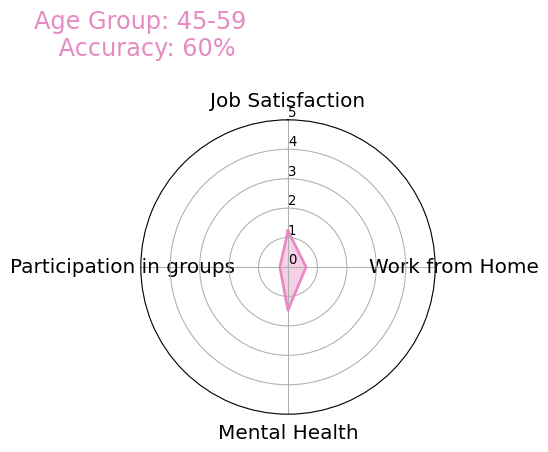

In [17]:
# plotting some radar plots?
# ne
# much courtesy of https://www.python-graph-gallery.com/392-use-faceting-for-radar-chart
# Libraries
from math import pi
from matplotlib import colormaps

# categories are the var names
# only doing one group. Group A
# values is every value under A plus a repeat of the first (so it closes)
 
# ------- PART 1: Define a function that do a plot for one line of the dataset!
 
def make_spider( row, title, color, df):
    # number of variable
    categories=list(df.index)
    N = len(categories)
    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    
    # Initialise the spider plot
    ax = plt.subplot(3,2,row, polar=True, )
    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='black', size=15)
    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([0,1,2,3,4,5], ["0","1","2",'3','4','5'], color="black", size=10)
    plt.ylim(0,5)
    # Ind1
    #values=df.loc[row].drop('group').values.flatten().tolist()
    # values=df.iloc[:,row-1].tolist()
    values = abs(df['coef']).tolist()
    values += values[:1]
    print(f'{values} {angles}')
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)
    # Add a title
    plt.title(title, size=18, color=color, y=1.0,x=0.01)
    
# ------- PART 2: Apply the function to all individuals
# initialize the figure
my_dpi=96
plt.figure(figsize=(1500/my_dpi, 1300/my_dpi), dpi=my_dpi)
 
# Create a color palette:
my_palette = colormaps["Set2"]
 
# # Loop to plot
# for row in range(0, len(df.index)):
#     make_spider( row=row, title='group '+df['group'][row], color=my_palette(row))
    
for row in summary_df['Age Group'].unique():
    title = ''
    if row == 1:
        title = '18-29 \n Accuracy: 64%\n\n'
        #make_spider( row=row, title=f'Age Group: {title}', color=my_palette(row), df = summary_df.loc[summary_df['Age Group'] == row])
        #break
    if row == 2:
        title = '30-44 \n Accuracy: 72%\n\n'
        #make_spider( row=row, title=f'Age Group: {title}', color=my_palette(row), df = summary_df.loc[summary_df['Age Group'] == row])
        #break
    if row == 3:
        title = '45-59 \n Accuracy: 60%\n\n'
        make_spider( row=row, title=f'Age Group: {title}', color=my_palette(row), df = summary_df.loc[summary_df['Age Group'] == row])
        break
    if row == 4:
        title = '60+ \n Accuracy: 80%\n\n'
        #make_spider( row=row, title=f'Age Group: {title}', color=my_palette(row), df = summary_df.loc[summary_df['Age Group'] == row])
        #break
    if row == 5:
        title = 'All\nAccuracy: 72%\n\n'
        #make_spider( row=row, title=f'Age Group: {title}', color=my_palette(row), df = summary_df.loc[summary_df['Age Group'] == row])
        #break
    #make_spider( row=row, title=f'Age Group: {title}', color=my_palette(row), df = summary_df.loc[summary_df['Age Group'] == row])

In [18]:
plot_data = pd.DataFrame(summary_plot)
plot_data['Variable']= plot_data.index

In [19]:
clean_plot_data = pd.DataFrame(pd.crosstab(plot_data['Age Group'],plot_data['Variable'],values=plot_data['coef'],aggfunc=sum))
clean_plot_data

Variable,CONWKDAY,HLTHMNTL,MOREWEEKS,PARTLSC,SATJOB,WRKHOME
Age Group,,,,,,
1.0,NaN,NaN,-0.4956,-0.2932,NaN,NaN
2.0,-0.3501,NaN,NaN,NaN,NaN,-0.4384
3.0,NaN,1.4716,NaN,0.2765,-1.2307,-0.6149
4.0,-0.8259,0.9437,NaN,NaN,NaN,NaN
5.0,-0.2271,0.6536,NaN,NaN,0.2740,-0.2468


ValueError: The number of FixedLocator locations (6), usually from a call to set_ticks, does not match the number of labels (7).

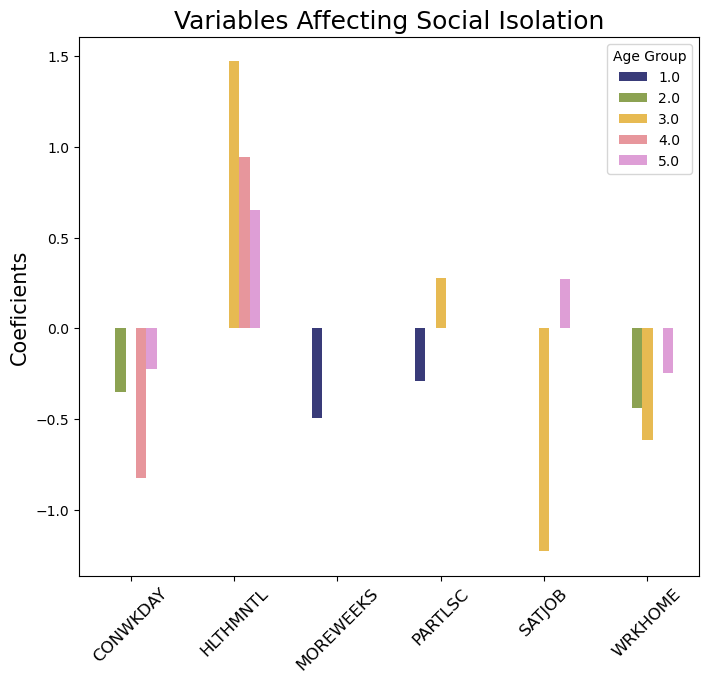

In [20]:
#plt.figure(figsize=(10,10))
ax = clean_plot_data.transpose().plot.bar(figsize=(8,7),rot=0,cmap='tab20b')

plt.title('Variables Affecting Social Isolation', fontsize=18)
plt.ylabel('Coeficients',fontsize=15)
plt.xlabel('',fontsize=15)
ax.tick_params(axis='y',labelsize=10)
ax.tick_params(axis='x', labelsize=12,rotation=45)
ax.set_xticklabels(['# of Weekday Interactions', 'Mental Health', 'Physical Health','moreweeks', 'Participation in groups','Job Satisfaction','Work from Home'])
plt.setp(ax.xaxis.get_majorticklabels(), ha="right" )
ax.legend(labels=['18-29', '30-44','45-59','60+'])

In [ ]:
#plt.figure(figsize=(10,10))
ax = clean_plot_data.transpose().plot.barh(figsize=(8,7),rot=0,cmap='tab20b')

plt.title('Variables Affecting Social Isolation', fontsize=18)
plt.xlabel('Coeficients',fontsize=15)
plt.ylabel('',fontsize=15)
ax.tick_params(axis='x',labelsize=12)
ax.tick_params(axis='y', labelsize=10)
ax.set_yticklabels(['# of Weekday Interactions', 'Mental Health', 'Physical Health','Job Overtime','Participation in Groups','Job Satisfaction','Work From Home'])
plt.setp(ax.yaxis.get_majorticklabels(), ha="right" )
ax.legend(labels=['18-29', '30-44','45-59','60+'])

In [109]:
# regular logit for all age groups
# https://napsterinblue.github.io/notes/machine_learning/regression/interaction_terms/

x = gss[['SATJOB','WRKHOME', 'HLTHPHYS', 'HLTHMNTL', 'CONWKDAY', 'PARTLSC','EDUC', 'MOREWEEKS']]
y = gss['is_si']

In [110]:
# rebalancing

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state= 42)

# Resampling only the training data
os = SMOTEN(random_state= 42)
x_train, y_train= os.fit_resample(x_train, y_train)

In [111]:
# statsmodels logit

sm_logit = sm.Logit(y_train, x_train)
result = sm_logit.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.584334
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                  is_si   No. Observations:                  728
Model:                          Logit   Df Residuals:                      720
Method:                           MLE   Df Model:                            7
Date:                Thu, 13 Apr 2023   Pseudo R-squ.:                  0.1570
Time:                        10:19:47   Log-Likelihood:                -425.39
converged:                       True   LL-Null:                       -504.61
Covariance Type:            nonrobust   LLR p-value:                 6.855e-31
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
SATJOB         0.2584      0.109      2.363      0.018       0.044       0.473
WRKHOME       -0.2628      0.

In [112]:
# sklearn logit

sk_logit = LogisticRegression()
sk_logit.fit(x_train, y_train)
y_pred = sk_logit.predict(x_test)
print('Accuracy on test set:{:.2f}'.format(sk_logit.score(x_test, y_test)))

Accuracy on test set:0.66


In [113]:
# let's work on some interactive terms
# how many columns can we expect after adding interactive terms?

print(x.shape)
p = len(x.columns)
expected_columns = (p * (p-1)) / 2 + p + 1
print(f'expected columns: {expected_columns}')

(688, 8)
expected columns: 37.0


In [114]:
# let's import
from sklearn.preprocessing import PolynomialFeatures

# and let's do the thing

interaction = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

# we wanna keep out feature names
from itertools import count
import re

x_to_feature = dict(zip(('x{}'.format(i) for i in count()), x.columns))
feature_keys = list(x_to_feature.keys())[::-1]

features = []

# these two lines were originally below line 30
x_inter = interaction.fit_transform(x)
x_inter_const = sm.add_constant(x_inter)

for feature in interaction.get_feature_names_out():
    for key in feature_keys:
        feature_name = x_to_feature[key]
        feature = re.sub(key, feature_name, feature)
    feature = re.sub(' ', '_', feature)
    features.append(feature)

# these next two lines actually do the column name swapping? is this the right spot?
x_inter = pd.DataFrame(x_inter, columns=features)
x_inter_const = sm.add_constant(x_inter)


x_inter_const.shape
# is this 37 as well? solido

(688, 37)

(688, 36)


<Axes: >

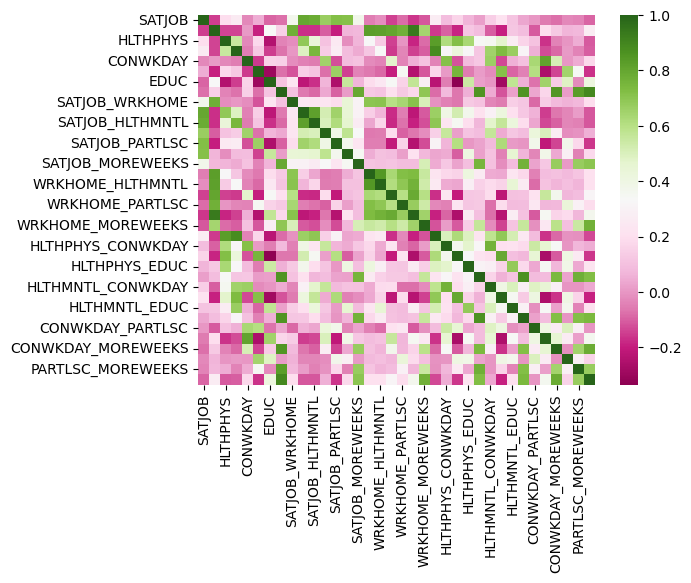

In [115]:
print(x_inter.shape)
sns.heatmap(x_inter.corr(), cmap="PiYG")

In [116]:
x_inter.corr()

,SATJOB,WRKHOME,HLTHPHYS,HLTHMNTL,CONWKDAY,PARTLSC,EDUC,MOREWEEKS,SATJOB_WRKHOME,SATJOB_HLTHPHYS,...,HLTHMNTL_CONWKDAY,HLTHMNTL_PARTLSC,HLTHMNTL_EDUC,HLTHMNTL_MOREWEEKS,CONWKDAY_PARTLSC,CONWKDAY_EDUC,CONWKDAY_MOREWEEKS,PARTLSC_EDUC,PARTLSC_MOREWEEKS,EDUC_MOREWEEKS
SATJOB,1.000000,-0.149723,0.195183,0.259054,-0.031288,0.049700,-0.093434,-0.077807,0.369189,0.797114,...,0.141789,0.208285,0.110555,0.034815,0.003039,-0.057051,-0.077714,-0.028263,-0.042145,-0.091371
WRKHOME,-0.149723,1.000000,-0.137082,-0.137260,0.006042,-0.190797,0.330941,0.147452,0.775568,-0.171196,...,-0.105089,-0.192934,0.113794,0.088401,-0.106944,0.193069,0.125602,0.062890,0.073541,0.265613
HLTHPHYS,0.195183,-0.137082,1.000000,0.552551,-0.030582,0.176914,-0.245789,-0.039694,-0.021271,0.689988,...,0.355087,0.469817,0.265866,0.163953,0.103736,-0.167348,-0.041125,-0.006340,0.050688,-0.105783
HLTHMNTL,0.259054,-0.137260,0.552551,1.000000,-0.049848,0.128824,-0.148223,-0.073582,0.001540,0.489945,...,0.651233,0.730753,0.667650,0.308369,0.051932,-0.130668,-0.087405,0.008794,-0.038443,-0.101365
CONWKDAY,-0.031288,0.006042,-0.030582,-0.049848,1.000000,-0.152676,0.157901,0.147898,-0.018281,-0.046036,...,0.664457,-0.134700,0.053122,0.102281,0.630459,0.807100,0.511322,0.001311,0.043734,0.173648
PARTLSC,0.049700,-0.190797,0.176914,0.128824,-0.152676,1.000000,-0.295059,-0.078528,-0.116333,0.140276,...,-0.023316,0.713511,-0.090181,-0.047368,0.603726,-0.259626,-0.136939,0.648961,0.343034,-0.163921
EDUC,-0.093434,0.330941,-0.245789,-0.148223,0.157901,-0.295059,1.000000,0.110940,0.230936,-0.218996,...,-0.001643,-0.285640,0.576917,0.052971,-0.072055,0.654744,0.138916,0.486311,-0.023604,0.413453
MOREWEEKS,-0.077807,0.147452,-0.039694,-0.073582,0.147898,-0.078528,0.110940,1.000000,0.105350,-0.063489,...,0.043369,-0.119058,0.023789,0.858298,0.034152,0.165769,0.853721,0.009470,0.830874,0.895150
SATJOB_WRKHOME,0.369189,0.775568,-0.021271,0.001540,-0.018281,-0.116333,0.230936,0.105350,1.000000,0.240914,...,-0.036727,-0.058600,0.143497,0.114474,-0.084919,0.135042,0.081006,0.058156,0.071733,0.194964
SATJOB_HLTHPHYS,0.797114,-0.171196,0.689988,0.489945,-0.046036,0.140276,-0.218996,-0.063489,0.240914,1.000000,...,0.293583,0.420093,0.201051,0.120992,0.059825,-0.148078,-0.065220,-0.036922,0.012620,-0.115547


In [120]:
# let's remove multi collinearity
from collinearity import SelectNonCollinear # https://github.com/gianlucamalato/collinearity
from sklearn.feature_selection import f_regression, SelectFdr, chi2
import numpy as np
def rem_collinear_features(correlation_threshold: float, scoring, x_df: pd.DataFrame, y_df: pd.DataFrame):
    selector = SelectNonCollinear(correlation_threshold, scoring=scoring)

    selector.fit(x_df.to_numpy(), y_df.to_numpy())
    mask = selector.get_support() # TODO: read doc on get_support()
    
    return pd.DataFrame(x_df.loc[:,mask],columns = np.array(x_df.columns)[mask]) 

In [121]:
x_inter = rem_collinear_features(0.88, chi2, x_inter, y)

In [122]:
x_inter

,SATJOB,HLTHPHYS,CONWKDAY,PARTLSC,EDUC,SATJOB_WRKHOME,SATJOB_HLTHPHYS,SATJOB_HLTHMNTL,SATJOB_CONWKDAY,SATJOB_PARTLSC,...,HLTHMNTL_CONWKDAY,HLTHMNTL_PARTLSC,HLTHMNTL_EDUC,HLTHMNTL_MOREWEEKS,CONWKDAY_PARTLSC,CONWKDAY_EDUC,CONWKDAY_MOREWEEKS,PARTLSC_EDUC,PARTLSC_MOREWEEKS,EDUC_MOREWEEKS
0,1.0,1.0,4.0,3.0,4.0,1.0,1.0,1.0,4.0,3.0,...,4.0,3.0,4.0,1.0,12.0,16.0,4.0,12.0,3.0,4.0
1,1.0,3.0,3.0,2.0,3.0,1.0,3.0,2.0,3.0,2.0,...,6.0,4.0,6.0,2.0,6.0,9.0,3.0,6.0,2.0,3.0
2,1.0,2.0,4.0,5.0,2.0,1.0,2.0,3.0,4.0,5.0,...,12.0,15.0,6.0,12.0,20.0,8.0,16.0,10.0,20.0,8.0
3,2.0,2.0,4.0,1.0,2.0,2.0,4.0,6.0,8.0,2.0,...,12.0,3.0,6.0,3.0,4.0,8.0,4.0,2.0,1.0,2.0
4,2.0,3.0,2.0,1.0,3.0,2.0,6.0,6.0,4.0,2.0,...,6.0,3.0,9.0,3.0,2.0,6.0,2.0,3.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683,2.0,2.0,3.0,4.0,3.0,2.0,4.0,4.0,6.0,8.0,...,6.0,8.0,6.0,2.0,12.0,9.0,3.0,12.0,4.0,3.0
684,2.0,1.0,5.0,1.0,3.0,2.0,2.0,4.0,10.0,2.0,...,10.0,2.0,6.0,2.0,5.0,15.0,5.0,3.0,1.0,3.0
685,1.0,2.0,5.0,1.0,2.0,1.0,2.0,3.0,5.0,1.0,...,15.0,3.0,6.0,9.0,5.0,10.0,15.0,2.0,3.0,6.0
686,2.0,3.0,4.0,5.0,3.0,10.0,6.0,4.0,8.0,10.0,...,8.0,10.0,6.0,4.0,20.0,12.0,8.0,15.0,10.0,6.0


In [123]:
# now let us do this again but with interactive terms
# resplit
# rebalance
# re-logit
x_train, x_test, y_train, y_test = train_test_split(x_inter, y, test_size= 0.3, random_state= 42)

# Resampling only the training data
os = SMOTEN(random_state = 42)
x_train, y_train= os.fit_resample(x_train, y_train)

# sklearn logit
sk_logit = LogisticRegression()
sk_logit.fit(x_train, y_train)
y_pred = sk_logit.predict(x_test)
print('sklearn Accuracy on test set:{:.2f}'.format(sk_logit.score(x_test, y_test)))

# statsmodel logit
sm_logit = sm.Logit(y_train, x_train)
result = sm_logit.fit()
print(f'statsmodels: \n{result.summary()}')

sklearn Accuracy on test set:0.70
Optimization terminated successfully.
         Current function value: 0.520030
         Iterations 6
statsmodels: 
                           Logit Regression Results                           
Dep. Variable:                  is_si   No. Observations:                  728
Model:                          Logit   Df Residuals:                      695
Method:                           MLE   Df Model:                           32
Date:                Thu, 13 Apr 2023   Pseudo R-squ.:                  0.2498
Time:                        10:20:06   Log-Likelihood:                -378.58
converged:                       True   LL-Null:                       -504.61
Covariance Type:            nonrobust   LLR p-value:                 5.142e-36
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
SATJOB                -0.5636      0.507    

/Users/mattsloan/mambaforge/envs/DTSC/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
